<a href="https://colab.research.google.com/github/cientistadados93/brazilianSerieA/blob/main/Serie_A_Brazilian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as classes que serão usadas no estudo

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Carregando os dados do site www.football-data.co.uk, em formato CSV

In [5]:
brazilA = pd.read_csv("https://www.football-data.co.uk/new/BRA.csv")

Analisando os dados disponiveis no arquivo com a função head(), para verificar as colunas e seus respectivos dados para utilização no estudo

In [40]:
brazilA.head(3)

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64


Criando variáveis para realizar a primeira analise de vitórias equipe da casa (home_win), empates (draw) e vitórias equipe visitante (away_win)

In [7]:
home_win = len(brazilA[brazilA.Res== 'H'])
draw = len(brazilA[brazilA.Res == 'D'])
away_win = len(brazilA[brazilA.Res == 'A'])

Lista 'results' com as 3 variaveis criadas acima

In [8]:
results = [home_win, draw, away_win]

'totalmatches' com a quantidade total de partidas realizadas no periodo analisado (ano de 2012 até 2021)

In [9]:
totalmatches = len(brazilA)

Calculando  aporcentagem das vitórias, utilizando o 'totalmatches' como divisor

In [10]:
home_rate = (float(home_win)/(totalmatches))*100
draw_rate = (float(draw)/(totalmatches))*100
away_rate = (float(away_win)/(totalmatches))*100

Lista 'results_rate' com as porcentagens de vitórias equipe da casa ( home_rate), empates (draw_rate) e vitórias equipe visitante (away_rate)

In [11]:
results_rate = [home_rate, draw_rate, away_rate]


Mostrando os resultados obtidos com o calculo da porcentagem, utilizando somente duas casas decimais

In [12]:
print('Home wins:{:.2f}%'.format(home_rate))
print('Draws:{:.2f}%'.format(draw_rate))
print('Away wins:{:.2f}%'.format(away_rate))


Home wins:49.05%
Draws:26.89%
Away wins:24.03%


# **Gráfico com números de vitórias de equipes mandantes, empates e equipes visitantes**

In [13]:
resultados = ['Vitórias Mandante', 'Empates', 'Vitórias Visitante']

Criando o ambiente para que os valores de cada barra aparecam no gráfico

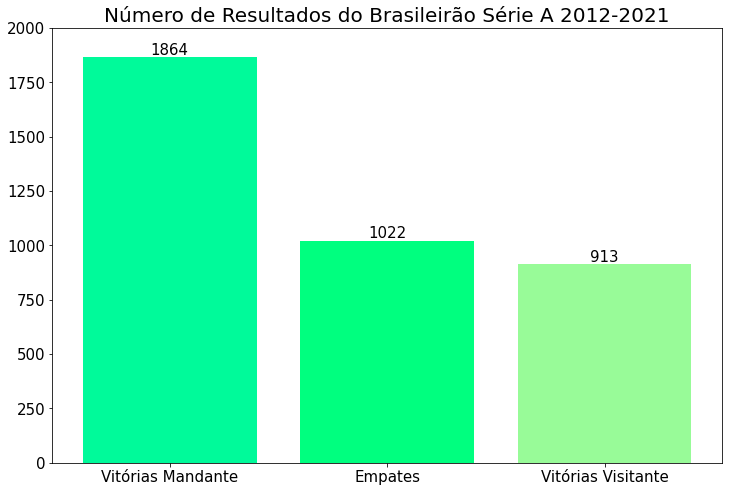

In [36]:
x = np.arange(len(resultados)) #tamanho de itens no eixo X
plt.figure(figsize=(12,8)) # determinando tamanho da figura/imagem

plot = plt.bar(x, results, color=['#00FA9A', '#00FF7F', '#98FB98'])

for i in plot.patches:
  plt.annotate(i.get_height(),
                (i.get_x() + i.get_width()/2,i.get_height()),
                ha='center', va='baseline',fontsize=15,
                xytext=(0,3),
                textcoords='offset points'
                )
  
plt.title("Número de Resultados do Brasileirão Série A 2012-2021", fontsize="20")
plt.yticks(size="15")
plt.xticks(x, resultados, size="15")
plt.ylim(0,2000)
plt.savefig("Resultados.jpeg")
plt.show()


In [53]:
#soma do total de gols em cada partida adicionado em uma nova coluna 'Total Goals'
brazilA["Total Goals"] = brazilA.HG + brazilA.AG


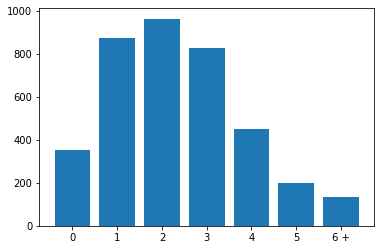

In [54]:
#Analisando os gols em toda a histórtia da competição

zerogoal = len(brazilA[brazilA["Total Goals"] == 0])
onegoal = len(brazilA[brazilA["Total Goals"] == 1])
twogoals = len(brazilA[brazilA["Total Goals"] == 2])
threegoals = len(brazilA[brazilA["Total Goals"] == 3])
fourgoals = len(brazilA[brazilA["Total Goals"] == 4])
fivegoals = len(brazilA[brazilA["Total Goals"] == 5])
sixormore = len(brazilA[brazilA["Total Goals"] >= 6])

goals = [zerogoal, onegoal, twogoals, threegoals, fourgoals, fivegoals, sixormore]

x = np.arange(7)
plt.bar(x, goals)
plt.xticks(x,('0', '1', '2', '3', '4', '5', '6 +'))
plt.show()


In [55]:
homegoals = brazilA.HG.sum()
awaygoals = brazilA.AG.sum()
totalgoals = brazilA["Total Goals"].sum()

In [56]:
goals_ha = [homegoals, awaygoals]

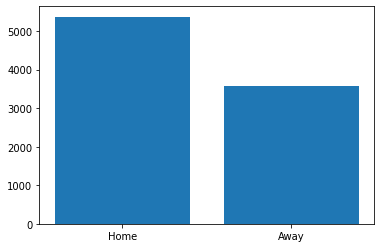

In [57]:
x = np.arange(2)
plt.bar(x, goals_ha)
plt.xticks(x,('Home', 'Away'))
plt.show()
